In [83]:
import pandas as pd
import altair as alt
from vega_datasets import data

alt.data_transformers.enable('json')
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('json')

### LOAD THE CLEAN CSV

In [57]:
df = pd.read_csv('../data/cleaned_data.csv',
                 usecols=['points', 'title', 'description', 'price',
                           'designation', 'variety', 'winery', 'county',
                           'county_id', 'state_id', 'value', 'state'])

In [58]:
df.head()

,points,title,description,price,designation,variety,state,winery,county,county_id,state_id,value
0,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",13.0,Reserve Late Harvest,Riesling,Michigan,St. Julian,Van Buren County,26159,26,6.692308
1,85,St. Julian NV Cathermsn's Port (Lake Michigan ...,Stewed fig and blackberry aromas meet a dried ...,16.0,Cathermsn's,Port,Michigan,St. Julian,Van Buren County,26159,26,5.312500
2,83,St. Julian 2013 Braganini Reserve Traminette (...,A citrus-rind aroma takes on an earthy bee-pol...,15.0,Braganini Reserve,Traminette,Michigan,St. Julian,Van Buren County,26159,26,5.533333
3,86,St. Julian NV Solera Cream Sherry (Lake Michig...,Aromas of roasted almond and pecan meet dried ...,16.0,Solera Cream,Sherry,Michigan,St. Julian,Van Buren County,26159,26,5.375000
4,88,St. Julian 2013 Braganini Reserve Late Harvest...,Candied peach and apricot aromas meld with dus...,20.0,Braganini Reserve Late Harvest,Vignoles,Michigan,St. Julian,Van Buren County,26159,26,4.400000


### GET THE COUNTS BY STATE AND COUNTY

In [129]:
# Optional Filter - remove Sonoma and Napa Valley
df = df.query("county != 'Sonoma County' and \
               county != 'Napa County' and \
               county != 'Yamhill County' \
               and county != 'King County' \
               and county != 'Walla Walla County' \
               and county != 'San Luis Obispo County' \
               and county != 'Santa Barbara County'")

state_counts = df.groupby(['state', 'state_id']).size().reset_index(name='counts')
county_counts = df.groupby(['county', 'county_id']).size().reset_index(name='counts')
# county_counts.sort_values(by='counts').tail(20)

### DRAW STATE CHOROPLETH

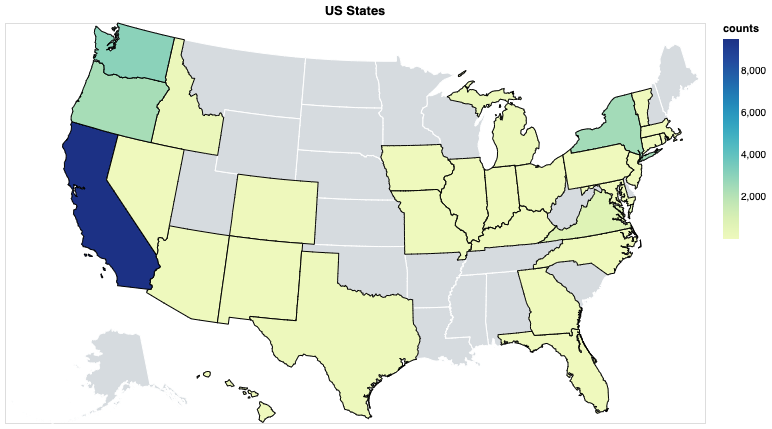

In [130]:
counties = alt.topo_feature(data.us_10m.url, 'counties')

foreground = alt.Chart(states).mark_geoshape().encode(
    color=alt.Color('counts:Q')#,
#                     scale=alt.Scale(scheme='viridis'))
).mark_geoshape(
    stroke='black',
    strokeWidth=1
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(state_counts, 'state_id', ['counts'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

background = alt.Chart(states).mark_geoshape(
    fill='#D6DBDF',
    stroke='white'
).properties(
    title='US States',
    width=700,
    height=400
).project('albersUsa')

background + foreground

### DRAW COUNTY CHOROPLETH

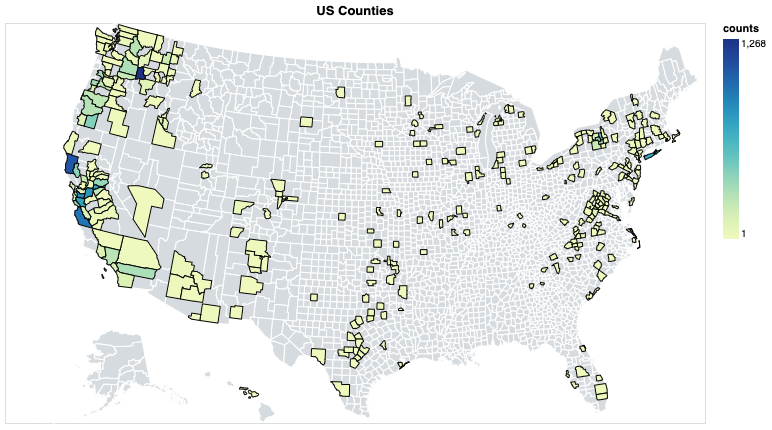

In [131]:
counties = alt.topo_feature(data.us_10m.url, 'counties')

foreground = alt.Chart(counties).mark_geoshape().encode(
    color=alt.Color('counts:Q')
).mark_geoshape(
    stroke='black',
    strokeWidth=1
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(county_counts, 'county_id', ['counts'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

background = alt.Chart(counties).mark_geoshape(
    fill='#D6DBDF',
    stroke='white'
).properties(
    title='US Counties',
    width=700,
    height=400
).project('albersUsa')

background + foreground

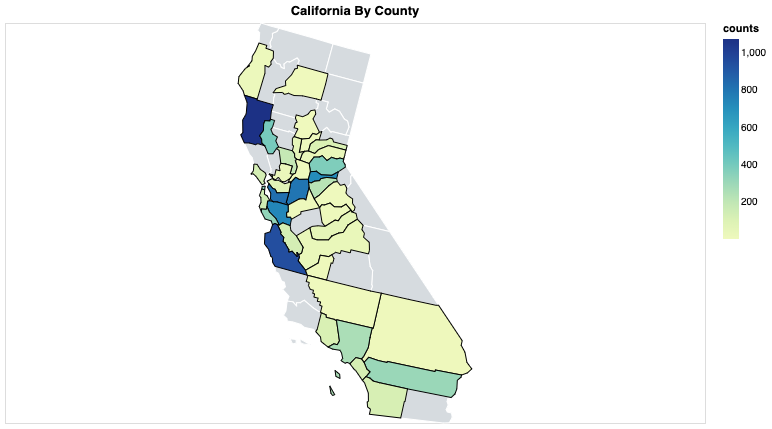

In [132]:
counties = alt.topo_feature(data.us_10m.url, 'counties')

state_id = 6 #California = 6

foreground =(
    alt.Chart(counties)
    .mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
        color='counts:Q')
    .transform_calculate(state_id = "(datum.id / 1000)|0")
    .transform_filter((alt.datum.state_id)==state_id)
    .transform_lookup(
        lookup='id',
        from_=alt.LookupData(county_counts, 'county_id', ['counts']))
)


background = alt.Chart(counties).mark_geoshape(
    fill='#D6DBDF',
    stroke='white'
).transform_calculate(state_id = "(datum.id / 1000)|0",
).transform_filter((alt.datum.state_id)==state_id,
).properties(
    title='California By County',
    width=700,
    height=400
).project('albersUsa')

background + foreground